In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
sns.set_style('whitegrid')

In [185]:
train = pd.read_csv('titanic_train.csv')

In [186]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [188]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


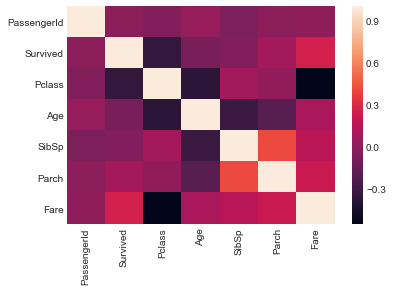

In [189]:
sns.heatmap(train.corr())

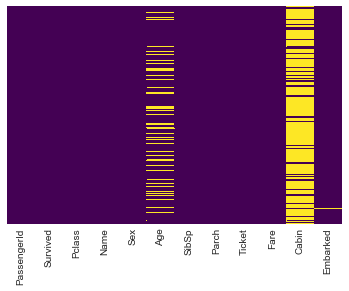

In [190]:
plt.xticks(rotation='90')
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

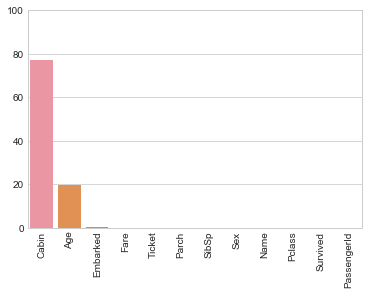

In [191]:
missing = (train.isnull().sum()/train.shape[0]).sort_values(ascending=False)
plt.xticks(rotation='90')
plt.ylim((0,100))
sns.barplot(x=missing.index, y=missing*100)

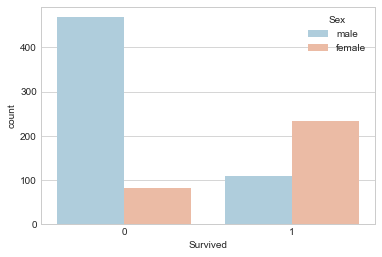

In [192]:
sns.countplot(train['Survived'], hue=train['Sex'], palette='RdBu_r')

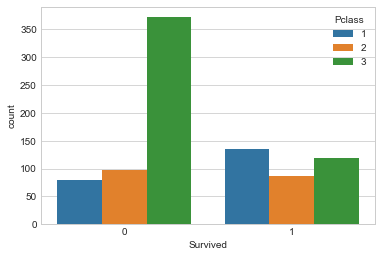

In [193]:
sns.countplot(data=train, x='Survived', hue='Pclass')

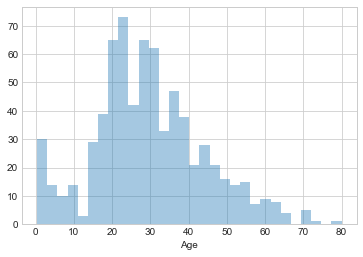

In [194]:
sns.distplot(a=train['Age'].dropna(), kde=False, bins=30)

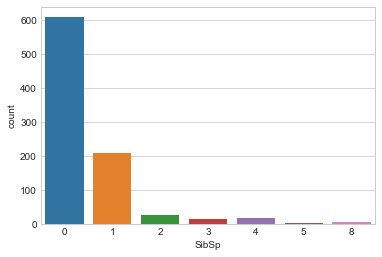

In [195]:
sns.countplot(data=train, x='SibSp')

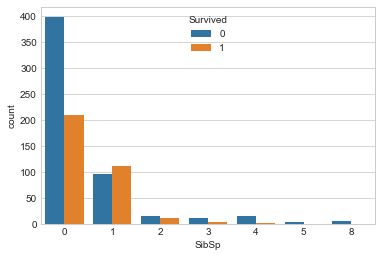

In [196]:
sns.countplot(data=train, x='SibSp', hue='Survived')

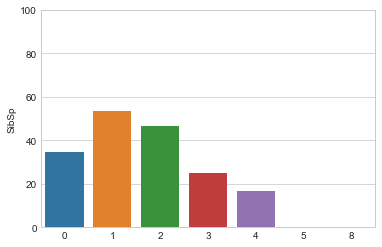

In [197]:
survive_by_sibsp = train[train['Survived'] == 1]['SibSp'].value_counts() / train['SibSp'].value_counts()
plt.xticks(rotation='0')
plt.ylim((0,100))
sns.barplot(x=survive_by_sibsp.index, y=survive_by_sibsp*100)

1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64

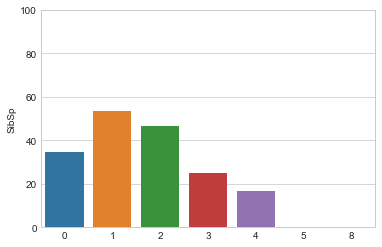

In [198]:
sorted_survive_by_sibsp = survive_by_sibsp.sort_values(ascending=False)
plt.xticks(rotation='0')
plt.ylim((0,100))
sns.barplot(x=sorted_survive_by_sibsp.index, y=sorted_survive_by_sibsp*100)
sorted_survive_by_sibsp

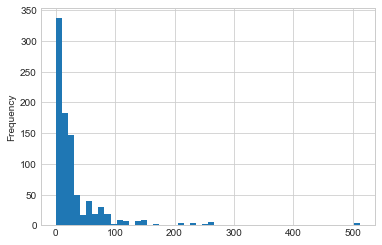

In [199]:
train['Fare'].plot.hist(bins=50)

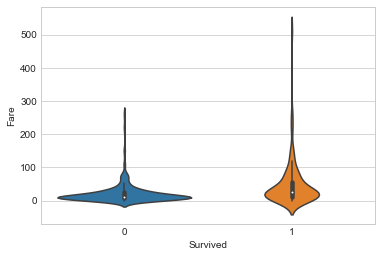

In [200]:
sns.violinplot(data=train, y='Fare', x='Survived')

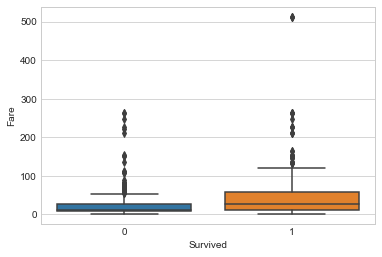

In [201]:
sns.boxplot(data=train, y='Fare', x='Survived')

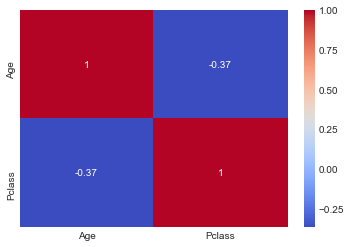

In [202]:
sns.heatmap(train[['Age', 'Pclass']].corr(), annot=True, cmap='coolwarm')

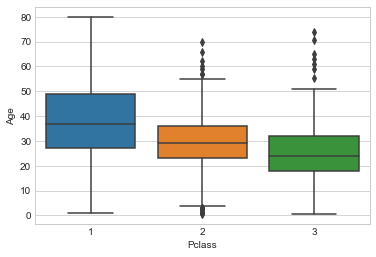

In [203]:
sns.boxplot(data=train, x='Pclass', y='Age')

In [204]:
def impute_age(df):
    
    mean_age_per_class = {}
    for pclass in df['Pclass'].unique():
        mean = df[df['Pclass'] == pclass]['Age'].mean()
        mean_age_per_class[str(pclass)] = mean

    df['Age'] = df['Age'].fillna(df['Pclass'].apply(lambda x: mean_age_per_class.get(str(x))))
    
    return df

In [205]:
train = impute_age(train)

In [206]:
train['Age'].isnull().sum()

0

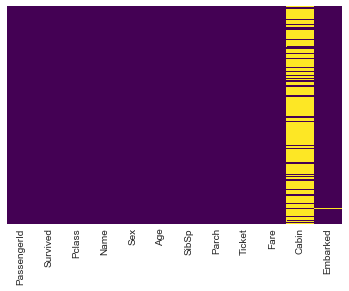

In [207]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [208]:
train.drop('Cabin', axis=1, inplace=True)

In [209]:
train.dropna(inplace=True)

In [210]:
sex = pd.get_dummies(data=train['Sex'],drop_first=True)

In [211]:
embark = pd.get_dummies(data=train['Embarked'],drop_first=True)

In [212]:
train = pd.concat([train, sex, embark], axis=1)

In [213]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [214]:
train.drop(['Name','Sex', 'Ticket','Embarked'], axis=1, inplace=True)

In [215]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [216]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [217]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [218]:
from sklearn.cross_validation import train_test_split

In [233]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [234]:
from sklearn.linear_model import LogisticRegression

In [235]:
lr = LogisticRegression()

In [236]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [237]:
lr.intercept_

array([3.52346919])

In [238]:
lr.coef_

array([[-0.78544563, -0.02616502, -0.21717006, -0.08743285,  0.00468494,
        -2.32085878, -0.00815135, -0.17358335]])

In [239]:
y_pred = lr.predict(X_val)

In [240]:
lr.score(X_val, y_val)

0.8089887640449438

In [241]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [242]:
confusion_matrix(y_pred=y_pred, y_true=y_val)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [243]:
print(classification_report(y_val, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267

